In [67]:
import pandas as pd
from utils.visulation_tools import * 
from utils.dicts_transformer import *
import os
os.sys.path
os.sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import cv2

In [92]:
margin=2
signs=[0,1,2,3,4,5,112,113,114]

def new_coordinates(r):
    x1=r['Roi.X1']
    x2=r['Roi.X2']
    y1=r['Roi.Y1']
    y2=r['Roi.Y2']
    width=r['Width']
    height=r['Height']
    x_size=x2-x1
    y_size=y2-y1
    
    if x1 < margin:
        x1_new=int(x1+x_size*0.167)
    else:
        x1_new=x1
    if y1 < margin:
        y1_new=int(y1+y_size*0.1)
    else:
        y1_new=y1
    if y2 > height - margin:
        y2_new=int(y2-y_size*0.267)
    else:
        y2_new=y2
    if x2 > width - margin:
        x2_new=int(x2-x_size*0.167)
    else:
        x2_new=x2
    if x1 < margin or y1 < margin or y2 > height - margin or x2 > width - margin:
        return [x1_new,x2_new,y1_new,y2_new], False
    
    return [x1_new,x2_new,y1_new,y2_new], True

def set_values(df,coordinates,index):
    df.set_value(index,'Roi.X1',coordinates[0])
    df.set_value(index,'Roi.X2',coordinates[1])
    df.set_value(index,'Roi.Y1',coordinates[2])
    df.set_value(index,'Roi.Y2',coordinates[3])
    
def set_values(df,coordinates,index):
    df.at[index,'Roi.X1']=coordinates[0]
    df.at[index,'Roi.X2']=coordinates[1]
    df.at[index,'Roi.Y1']=coordinates[2]
    df.at[index,'Roi.Y2']=coordinates[3]
    
def adjust_zones(zones):
    sucess=[]
    failure=[]
    for index, row in zones.iterrows():
        if row['ClassId'] in signs:
            coordinates, sucess_bool=new_coordinates(row)
            set_values(zones,coordinates,index)
            if sucess_bool:
                sucess.append([index,row])
            else:
                failure.append([index,row])
    return sucess, failure
            
def search_Zones(zones):
    rows=[]
    for index, row in zones.iterrows():
        if row['ClassId'] in signs:
            rows.append(row)
    return rows

def get_all_sign(zones):
    rows=[]
    for index, row in zones.iterrows():
        rows.append(row)
    return rows

def get_Zones_idx(zones):
    rows_idx=[]
    for index, row in zones.iterrows():
        if row['ClassId'] in signs:
            rows_idx.append(index)
    return rows_idx

def draw_box(row):
    colors=['red','green','yellow','blue','magenta','orange']
    #for j, (index, row) in enumerate(labels.iterrows()): 
    j=1
    plt.gca().add_patch(Rectangle((row['Roi.X1'],row['Roi.Y1']),row['Roi.X2']-row['Roi.X1'],row['Roi.Y2']-row['Roi.Y1'],linewidth=1,edgecolor=colors[j],facecolor='none',label=sign_name_carolo_dict_new[sign_name_carolo_trans[row['ClassId']]]))

# Set filename

In [71]:
filename="2019-01-09-13-55-01"
image_basepath="/home/sebastian/Phoenix/Images/"

# Load Data

In [33]:
image_path=image_basepath+filename+"/"
data = pd.read_csv("csv_files/"+filename+".csv")
data2=data.copy()
s,f=adjust_zones(data2)
approval_list=get_Zones_idx(data2)

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


# Check all:

In [88]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

@interact
def visulize(index=IntSlider(min=0,max=len(zones)-1,step=1,value=0)):
    img=approval_list[index]
    r=data2.iloc[[img]]
    width=int(r["Width"])
    height=int(r["Height"])
    x1=int(r['Roi.X1'])
    x2=int(r['Roi.X2'])
    y1=int(r['Roi.Y1'])
    y2=int(r['Roi.Y2'])
    x1s=IntSlider(min=0,max=width,step=1,value=x1)
    x2s=IntSlider(min=0,max=width,step=1,value=x2)
    y1s=IntSlider(min=0,max=height,step=1,value=y1)
    y2s=IntSlider(min=0,max=height,step=1,value=y2)
    @interact
    def adjust_now(x1_new=x1s,x2_new=x2s,y1_new=y1s,y2_new=y2s):
        im = Image.open(image_path+zones[index]['Filename'])
        set_values(data2,[x1_new,x2_new,y1_new,y2_new],img)
        box=[ x for _, x in data2.iloc[[img]].iterrows()][0]
        draw_box(box)
        plt.imshow(im)
        plt.legend(bbox_to_anchor=(2.1, 0.5), loc='center right', ncol=1)
        

interactive(children=(IntSlider(value=0, description='index', max=224), Output()), _dom_classes=('widget-inter…

# Check only edge cases:

In [91]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

data2=data.copy()
s,f=adjust_zones(data2)
approval_list=get_Zones_idx(data2)


@interact
def visulize(index=IntSlider(min=0,max=len(f)-1,step=1,value=0)):
    img=f[index][0]
    r=data2.iloc[[img]]
    width=int(r["Width"])
    height=int(r["Height"])
    x1=int(r['Roi.X1'])
    x2=int(r['Roi.X2'])
    y1=int(r['Roi.Y1'])
    y2=int(r['Roi.Y2'])
    x1s=IntSlider(min=0,max=width,step=1,value=x1)
    x2s=IntSlider(min=0,max=width,step=1,value=x2)
    y1s=IntSlider(min=0,max=height,step=1,value=y1)
    y2s=IntSlider(min=0,max=height,step=1,value=y2)
    @interact
    def adjust_now(x1_new=x1s,x2_new=x2s,y1_new=y1s,y2_new=y2s):
        im = Image.open(image_path+f[index][1]['Filename'])
        set_values(data2,[x1_new,x2_new,y1_new,y2_new],img)
        box=[ x for _, x in data2.iloc[[img]].iterrows()][0]
        draw_box(box)
        plt.imshow(im)
        plt.legend(bbox_to_anchor=(2.1, 0.5), loc='center right', ncol=1)
        

interactive(children=(IntSlider(value=0, description='index', max=22), Output()), _dom_classes=('widget-intera…

# Save File:

In [ ]:
data2.to_csv("csv_files/"+filename+"_updated.csv",index=False)

# Backup

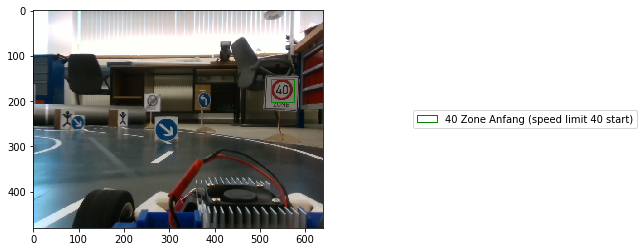

In [81]:
im = Image.open(image_path+zones[0]['Filename'])
box=zones[0]
draw_box(box)

plt.imshow(im)
plt.legend(bbox_to_anchor=(2.1, 0.5), loc='center right', ncol=1)

In [82]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
zones2=get_all_sign(data)
@interact
def visulize(img=IntSlider(min=0,max=len(zones2)-1,step=1,value=0)):
    im = Image.open(image_path+zones2[img]['Filename'])
    box=zones2[img]
    draw_box(box)

    plt.imshow(im)
    plt.legend(bbox_to_anchor=(2.1, 0.5), loc='center right', ncol=1)

interactive(children=(IntSlider(value=0, description='img', max=4858), Output()), _dom_classes=('widget-intera…

In [ ]:
im = Image.open(image_path+zones[0]['Filename'])
box=zones[0]
draw_box(box)

plt.imshow(im)
plt.legend(bbox_to_anchor=(2.1, 0.5), loc='center right', ncol=1)

In [ ]:
im = Image.open(image_path+zones[0]['Filename'])
box=zones[0]
draw_box(box)

plt.imshow(im)
plt.legend(bbox_to_anchor=(2.1, 0.5), loc='center right', ncol=1)

In [18]:
def draw_box(row):
    colors=['red','green','yellow','blue','magenta','orange']
    #for j, (index, row) in enumerate(labels.iterrows()): 
    j=1
    if row['ClassId'] in ['60 Zone Anfang (speed limit 60 start)']:
        co=new_coordinates(row)
        plt.gca().add_patch(Rectangle((co[0],co[2]),co[1]-co[0],co[3]-co[2],linewidth=1,edgecolor=colors[j],facecolor='none',label=row['ClassId']))            
    else:
        plt.gca().add_patch(Rectangle((row['Roi.X1'],row['Roi.Y1']),row['Roi.X2']-row['Roi.X1'],row['Roi.Y2']-row['Roi.Y1'],linewidth=1,edgecolor=colors[j],facecolor='none',label=sign_name_carolo_dict_new[sign_name_carolo_trans[row['ClassId']]]))

In [ ]:
for z in zones:
    im = Image.open(image_path+z['Filename'])
    zone=z.copy()
    new=transform_zone(zone,im)
    draw_box(new)
    plt.imshow(im)
    plt.show()

In [ ]:
new

In [ ]:
box

In [ ]:
zones[1]

In [ ]:
plt.imshow(np.array(im))

In [ ]:
crop_img=np.array(im)[box['Roi.Y1']:box['Roi.Y2'], box['Roi.X1']:box['Roi.X2']]
plt.imshow(crop_img)

In [ ]:
def transform_zone(zone,im):
    box=zone.copy()
    new=find_cycle(im,box)
    box['Roi.Y1']=box['Roi.Y1']+new[1]
    box['Roi.Y2']=box['Roi.Y1']+new[3]-new[1]
    box['Roi.X1']=box['Roi.X1']+new[0]
    box['Roi.X2']=box['Roi.X1']+new[2]-new[0]
    return box
    
def find_cycle(im,box):
    crop_img=np.array(im)[box['Roi.Y1']:box['Roi.Y2'], box['Roi.X1']:box['Roi.X2']]
    #plt.imshow(crop_img)
    output = crop_img.copy()
    #gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    gray =crop_img[:,:,2]
    #gray=(gray/64)
    #gray.astype(int)
    #gray=gray*64
    #print(gray.shape)
    #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #gray = cv2.filter2D(gray, -1, kernel)
    plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
    plt.show()
    gray_blurred = cv2.blur(gray, (3, 3)) # detect circles in the image
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1, 20, param1 = 50, param2 = 30, minRadius = 1, maxRadius = 100)
    new_box=[]
    max_area=0
    max_idx=0
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
        
        for (x, y, r) in circles:
            s=int(r*0.1)
            cv2.circle(output, (x, y), r, (0, 255, 0), 1)
            cv2.rectangle(output, (x - r - s, y - r - s), (x + r + s, y + r + s), (0, 128, 255), 1)
            new_box.append([x - r - s, y - r - s, x + r + s, y + r + s])
        plt.imshow(output)
        plt.show()
        for i,boxes in enumerate(new_box):
            if (boxes[2]-boxes[0])*(boxes[3]-boxes[1])>max_area and  x + r + s<gray.shape[1] and y + r + s<gray.shape[0]:
                max_area=(boxes[2]-boxes[0])*(boxes[3]-boxes[1])
                max_idx=i
        return new_box[max_idx]
    return [0,0,0,0]
    # show the output image
    #cv2.imshow("output", np.hstack([crop_img, output]))
    #cv2.waitKey(0)

In [ ]:
output = crop_img.copy()
gray = cv2.cvtColor(crop_img, cv2.COLOR_RGB2GRAY)
gray_blurred = cv2.blur(gray, (2, 2)) # detect circles in the image
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT,1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 100) 
 

In [ ]:
crop_img=np.array(im)[box['Roi.Y1']:box['Roi.Y2'], box['Roi.X1']:box['Roi.X2']]

In [ ]:
plt.imshow(crop_img)

In [ ]:
gray = cv2.cvtColor(crop_img, cv2.COLOR_RGB2GRAY)
plt.imshow(crop_img[:,:,2], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
crop_img=np.array(im)[box['Roi.Y1']:box['Roi.Y2'], box['Roi.X1']:box['Roi.X2']]
#plt.imshow(crop_img)
output = crop_img.copy()
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
gray = crop_img[:,:,2]
#gray=(gray/8)
#gray.astype('uint8')
#gray=gray*8
#gray.astype(float)
print(gray.shape)

gray = cv2.blur(gray, (2, 2))
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
gray = cv2.filter2D(gray, -1, kernel)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

plt.show()
gray_blurred = cv2.blur(gray, (3, 3)) # detect circles in the image
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT,1, 20, param1 = 50, param2 = 30, minRadius = 1, maxRadius = 100)
circles

In [ ]:
cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY).shape

In [ ]:
gray=(gray/64)
gray.astype(int)
gray=gray*64
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#gray = cv2.filter2D(gray, -1, kernel)
gray_blurred = cv2.blur(gray, (2, 2)) # detect circles in the image
plt.imshow(gray_blurred, cmap='gray', vmin=0, vmax=255)
plt.show()


In [ ]:

# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        s=int(r*0.1)
        cv2.circle(output, (x, y), r, (0, 255, 0), 1)
        #cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        cv2.rectangle(output, (x - r - s, y - r - s), (x + r + s, y + r + s), (0, 128, 255), 1)
    # show the output image
    #cv2.imshow("output", np.hstack([crop_img, output]))
    #cv2.waitKey(0)
plt.imshow(output)

In [ ]:
data